# Bayesian Network Learning

## Steps

1. Load the data
2. Install and test the Bayesian Network library
3. Analyze the data before starting with Bayesian Network learning
4. Learn and apply the Bayesian Network 

## Load the data

Load the epedemic process data from  `epidemic_process.csv`:

In [1]:
df <- read.csv("data/epidemic_process.csv",header = FALSE)
head(df,5)

,V1,V2,V3,V4,V5,V6,V7,V8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.484789,31.727771,6.910956,1.08608836,0.3646911,-1.16771646,155.6258,0.9566363
2,8.578305,34.552430,3.908585,1.46419574,-4.3507474,-0.66412494,120.7446,0.9821868
3,1.525187,3.581051,7.528895,0.07795365,0.4458266,0.03096206,357.8053,0.4723493
4,6.151596,33.205968,6.199945,1.14855785,-1.5739643,-0.61707895,133.9650,0.9610038
5,4.443471,30.324971,8.335484,0.97068688,2.7658724,-1.67206454,162.8004,0.8819359


In [2]:
colnames(df)[1] <- "N_50"
colnames(df)[2] <- "N_150"
colnames(df)[3] <- "N_300"
colnames(df)[4] <- "D_50"
colnames(df)[5] <- "D_150"
colnames(df)[6] <- "D_300"
colnames(df)[7] <- "T_peak"
colnames(df)[8] <- "X_500"
head(df,5)

,N_50,N_150,N_300,D_50,D_150,D_300,T_peak,X_500
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.484789,31.727771,6.910956,1.08608836,0.3646911,-1.16771646,155.6258,0.9566363
2,8.578305,34.552430,3.908585,1.46419574,-4.3507474,-0.66412494,120.7446,0.9821868
3,1.525187,3.581051,7.528895,0.07795365,0.4458266,0.03096206,357.8053,0.4723493
4,6.151596,33.205968,6.199945,1.14855785,-1.5739643,-0.61707895,133.9650,0.9610038
5,4.443471,30.324971,8.335484,0.97068688,2.7658724,-1.67206454,162.8004,0.8819359


## Install and test the Bayesian Network library

In `R` the package `bnlearn` [1] is recommended.

In [3]:
install.packages("bnlearn")
library("bnlearn")


  There is a binary version available but the source version is later:
        binary source needs_compilation
bnlearn    4.7  4.7.1              TRUE



installing the source package ‘bnlearn’


Warning message in install.packages("bnlearn"):
“installation of package ‘bnlearn’ had non-zero exit status”


We check a few steps from the `bnlearn` tutorial [2]. It instructs us to take the following steps:

1. learning the structure of the network, or creating one manually, gives an object of class `bn` that encodes a graph;
2. learning the parameters for a given structure starts from a `bn` object and gives an object of class `bn.fit` that encodes the graph and the graph and the conditional probabilities;
3. using the object of class `bn.fit` for inference. 

**Step 1:** Create a Bayesian Network structure from data. It is of class `bn` (documentation `?"bn class"`).

In [5]:
#?"bn class" #(comment/uncomment to hide/see the documentation)

In [7]:
dag = hc(df)
dag


  Bayesian network learned via Score-based methods

  model:
   [N_150][D_300][T_peak|N_150][N_50|N_150:D_300:T_peak]
   [N_300|N_50:N_150:T_peak][X_500|N_150:N_300:T_peak]
   [D_150|N_150:N_300:D_300:X_500][D_50|N_50:D_150]
  nodes:                                 8 
  arcs:                                  16 
    undirected arcs:                     0 
    directed arcs:                       16 
  average markov blanket size:           5.25 
  average neighbourhood size:            4.00 
  average branching factor:              2.00 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (Gauss.) 
  penalization coefficient:              1.956012 
  tests used in the learning procedure:  140 
  optimized:                             TRUE 


**Step 2:** Learn the conditional probabilities and create an object of class `bn.fit` (documentation `?"bn.fit class"`).

In [8]:
#?"bn.fit class" #(comment/uncomment to hide/see the documentation)

In [9]:
fitted = bn.fit(dag, data = df)
fitted


  Bayesian network parameters

  Parameters of node N_50 (Gaussian distribution)

Conditional density: N_50 | N_150 + D_300 + T_peak
Coefficients:
(Intercept)        N_150        D_300       T_peak  
22.53354499  -0.13569241   2.89241010  -0.05903338  
Standard deviation of the residuals: 2.052607 

  Parameters of node N_150 (Gaussian distribution)

Conditional density: N_150
Coefficients:
(Intercept)  
   26.08403  
Standard deviation of the residuals: 9.34882 

  Parameters of node N_300 (Gaussian distribution)

Conditional density: N_300 | N_50 + N_150 + T_peak
Coefficients:
(Intercept)         N_50        N_150       T_peak  
40.98092906  -0.99421836  -0.52720012  -0.08138731  
Standard deviation of the residuals: 0.9271315 

  Parameters of node D_50 (Gaussian distribution)

Conditional density: D_50 | N_50 + D_150
Coefficients:
(Intercept)         N_50        D_150  
-0.23500075   0.23925440   0.02785962  
Standard deviation of the residuals: 0.1327802 

  Parameters of node D_

**Step 3:** Now we are ready to use the `bn.fit` object. 

We can generate random samples:

In [10]:
set.seed(1)
random_sample <- rbn(fitted, n = 10)
head(random_sample,5)

,N_50,N_150,N_300,D_50,D_150,D_300,T_peak,X_500
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.755674,20.22743,3.744598,1.7232889,1.4204171,-0.4327158,229.87686,0.7131789
2,4.869642,27.80088,6.530647,0.8433825,0.2715994,-1.0391149,180.82999,0.8391270
3,3.528535,18.27189,10.928453,0.7732084,2.9756058,-1.5855982,215.72864,0.8208239
4,8.710506,40.99803,9.744541,1.7715346,1.6704454,-2.4468511,18.16227,1.2303484
5,3.987244,29.16454,7.345600,0.5033554,-1.7642717,-0.6418055,167.80281,0.9392131


We can predict new observations:

In [11]:
library(dplyr)
new_data <- random_sample[1,]
new_data <- select(new_data,-c(8))
new_data
predict(fitted, node = "X_500", data = new_data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,N_50,N_150,N_300,D_50,D_150,D_300,T_peak
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.755674,20.22743,3.744598,1.723289,1.420417,-0.4327158,229.8769


[1] 0.701526

This is quite close to `0.7131789`.

We can compute probabilities with queries:

In [12]:
cpquery(fitted, event = (N_50 <= 7) & (N_150 <= 20) & (N_300 <= 10), evidence = (T_peak >= 100))

[1] 0.07308534

We can generate (weighted) observations from arbitrary conditional distributions.

In [13]:
N_x <- cpdist(fitted, nodes = c("N_50", "N_150", "N_300"), evidence = (T_peak >= 100), n = 1000)
head(N_x,5)

,N_50,N_150,N_300
,<dbl>,<dbl>,<dbl>
1,0.2238915,24.77605,9.851049
2,10.6485287,33.44829,1.473389
3,8.3452148,31.75850,4.931674
4,7.1837007,33.26271,6.596407
5,2.9710913,29.21923,10.728515


## Analyze the data before starting with Bayesian Network learning

Since we will be using Gaussian Bayesian Networks for the analysis, it also interesting to check whether the variables are normally distributed, at least marginally.

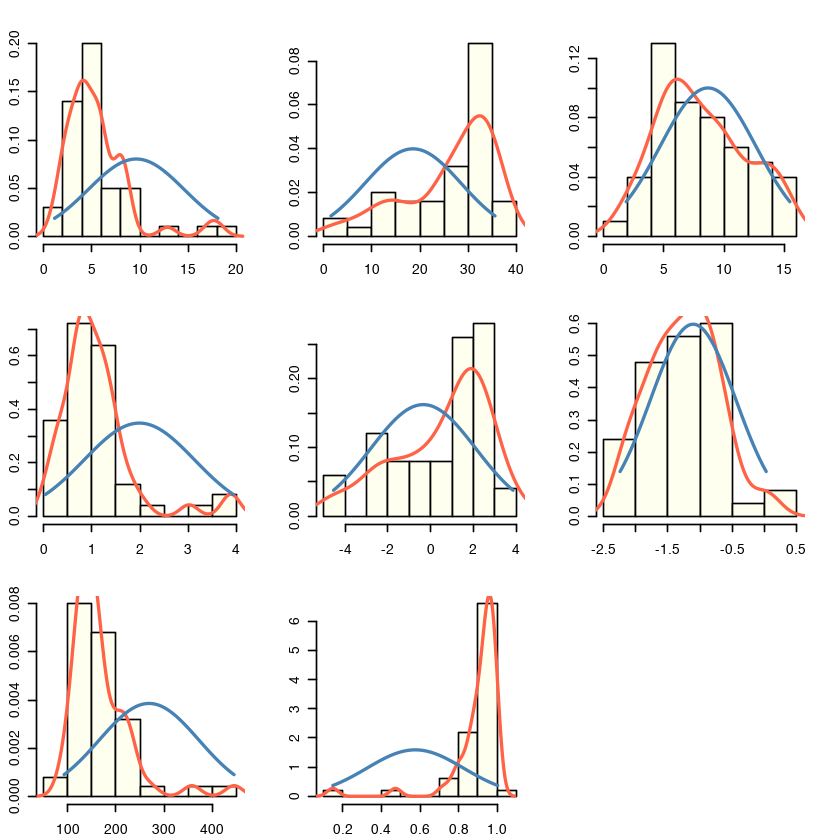

In [14]:
par(mfrow = c(3, 3), mai=c(0.3,0.3,0.3,0.3))
for (var in c("N_50", "N_150", "N_300", "D_50", "D_150", "D_300", "T_peak", "X_500")) {
    x = df[, var]   
    hist(x, prob = TRUE, xlab = var, ylab = "", main = "", col = "ivory")
    lines(density(x), lwd = 2, col = "tomato")
    curve(dnorm(x, mean = mean(x), sd = sd(x)), from = min(x), to = max(x), add = TRUE, lwd = 2, col = "steelblue")
}

*Interprete the results! Your answer goes here.*

Are the variables linked by linear relationships?

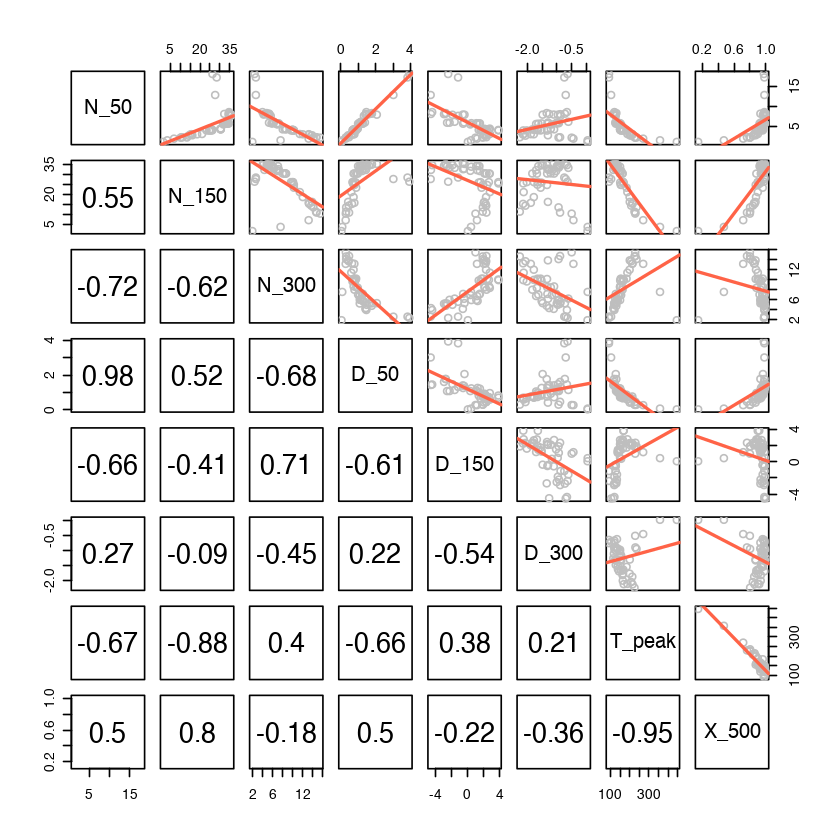

In [15]:
pairs(df[, names(df)],
      upper.panel = function(x, y, ...) {
          points(x = x, y = y, col = "grey")
          abline(coef(lm(y ~ x)), col = "tomato", lwd = 2)
      },
      lower.panel = function(x, y, ...) {
          par(usr = c(0, 1, 0, 1))
          text(x = 0.5, y = 0.5, round(cor(x, y), 2), cex = 2)
      }
     )

*Actually, we've checked their correlation already. But watch out for outliers and leverage points! Double check the pairwise correlation in detail if interesting! Interprete the results! Your answer goes here.*

Finally, we can take a look at whether the variables cluster by correlation, since variables that cluster together are more likely to be linked in the Bayesian Network.


The downloaded binary packages are in
	/var/folders/ct/4pcck8t94sdfc73rhymq4t140000gp/T//Rtmp3rnnbV/downloaded_packages



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




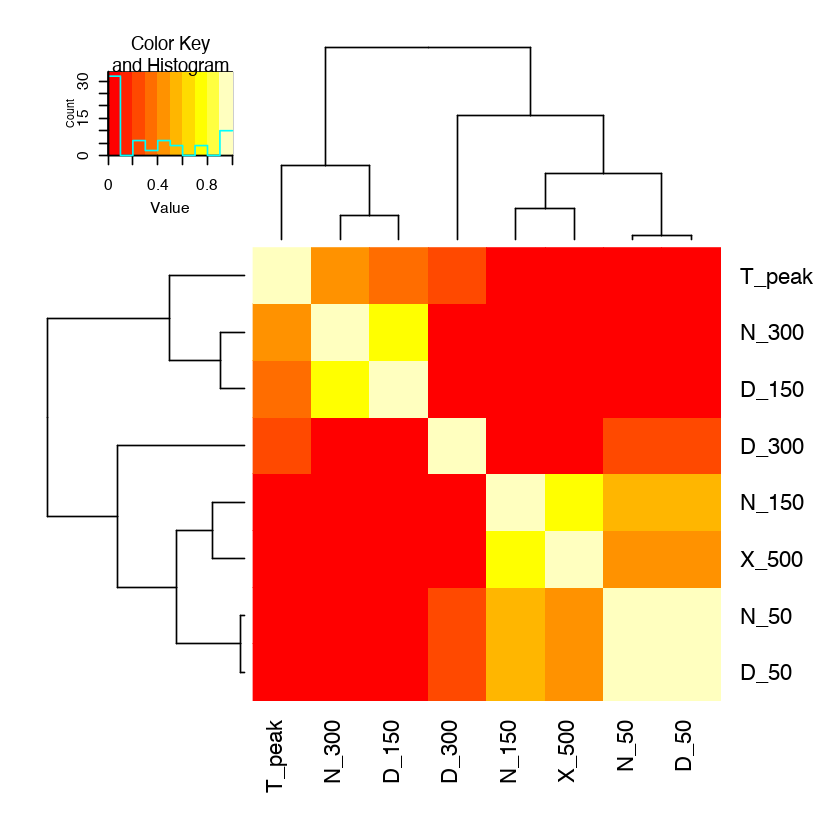

In [16]:
install.packages("gplots")
library("gplots")
rho = cor(df)
palette.breaks = seq(0, 1, 0.1)
par(oma = c(2, 2, 2, 1))
heatmap.2(rho, scale = "none", trace = "none", revC = TRUE, breaks = palette.breaks)

Lighter colors correspond to higher correlation. We can see two clusters in the heatmap: the first comprises $T_{peak}, N_{300}, D_{150}$, the second one $N_{50}, N_{150}, X_{500}, D_{150}$.

For the next steps, we install a graph (visualization) library.

In [17]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install()
BiocManager::install(c("graph", "Rgraphviz"))

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.2 (2019-12-12)

Old packages: 'BH', 'BiocManager', 'Cairo', 'DBI', 'DT', 'DiagrammeR',
  'IRdisplay', 'IRkernel', 'KernSmooth', 'MASS', 'Matrix', 'MatrixModels',
  'R6', 'RColorBrewer', 'Rcpp', 'RcppArmadillo', 'RcppEigen', 'backports',
  'bitops', 'bnlearn', 'boot', 'brew', 'brio', 'broom', 'caTools', 'callr',
  'car', 'carData', 'class', 'cli', 'clipr', 'cluster', 'codetools',
  'colorspace', 'commonmark', 'conquer', 'corrplot', 'covr', 'cowplot',
  'cpp11', 'crayon', 'crosstalk', 'curl', 'data.table', 'dbplyr', 'desc',
  'devtools', 'diffobj', 'digest', 'dplyr', 'e1071', 'ellipsis', 'evaluate',
  'fansi', 'farver', 'fastmap', 'forcats', 'fs', 'generics', 'ggplot2',
  'ggrepel', 'ggsignif', 'gh', 'git2r', 'glue', 'gtools', 'haven', 'highr',
  'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'influenceR',
  'jsonlite', 'knitr', 'labeling', 'later', 'lattice', 'lifecycle', 'lme4',
  'lubridate', 'magrittr', 'maptools'


The downloaded binary packages are in
	/var/folders/ct/4pcck8t94sdfc73rhymq4t140000gp/T//Rtmp3rnnbV/downloaded_packages


Old packages: 'BH', 'BiocManager', 'Cairo', 'DBI', 'DT', 'DiagrammeR',
  'IRdisplay', 'IRkernel', 'KernSmooth', 'MASS', 'Matrix', 'MatrixModels',
  'R6', 'RColorBrewer', 'Rcpp', 'RcppArmadillo', 'RcppEigen', 'backports',
  'bitops', 'bnlearn', 'boot', 'brew', 'brio', 'broom', 'caTools', 'callr',
  'car', 'carData', 'class', 'cli', 'clipr', 'cluster', 'codetools',
  'colorspace', 'commonmark', 'conquer', 'corrplot', 'covr', 'cowplot',
  'cpp11', 'crayon', 'crosstalk', 'curl', 'data.table', 'dbplyr', 'desc',
  'devtools', 'diffobj', 'digest', 'dplyr', 'e1071', 'ellipsis', 'evaluate',
  'fansi', 'farver', 'fastmap', 'forcats', 'fs', 'generics', 'ggplot2',
  'ggrepel', 'ggsignif', 'gh', 'git2r', 'glue', 'gtools', 'haven', 'highr',
  'hms', 'htmltools', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'influenceR',
  'jsonlite', 'knitr', 'labeling', 'later', 'lattice', 'lifecycle', 'lme4',
  'lubridate', 'magrittr', 'maptools', 'matrixStats', 'memoise', 'mgcv',
  'mime', 'modelr', 'nlme', 'nloptr

We plot the connected components of the following graph: the nodes are the variables, there is an edge between any two node iff the corresponding variables are correlated with $\rho >0.4$ (moderately or strongly correlated). 

Loading required namespace: Rgraphviz



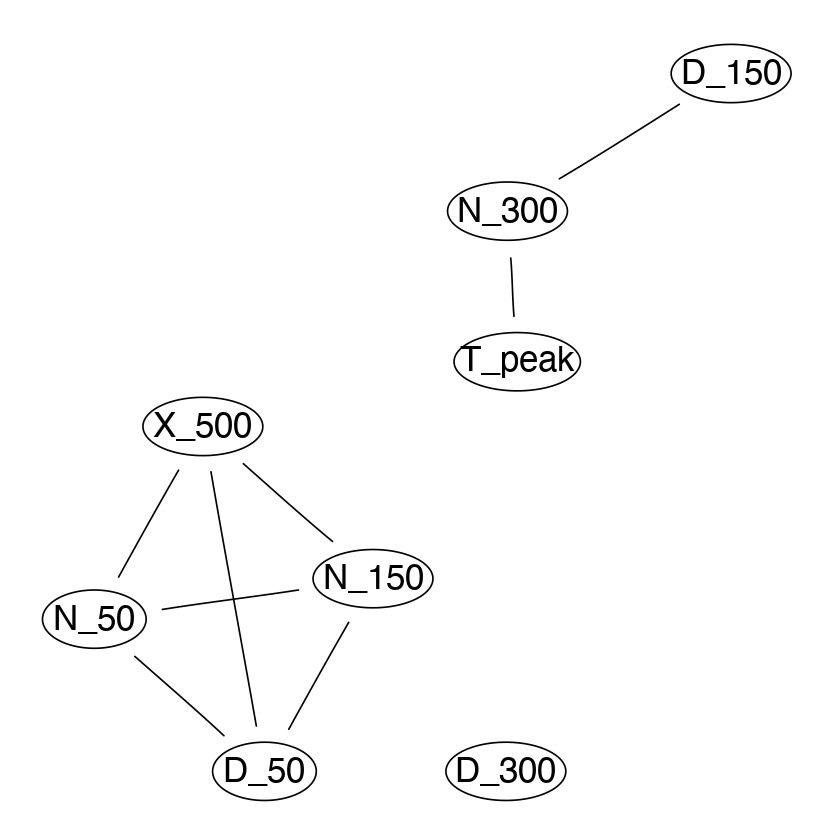

In [18]:
#colnames(rho)
ug = empty.graph(colnames(rho))
amat(ug) = (rho > 0.4) + 0L - diag(1L, nrow(rho))
graphviz.plot(ug, layout = "fdp", shape = "ellipse")

Recall the learned Bayesian Network structure.

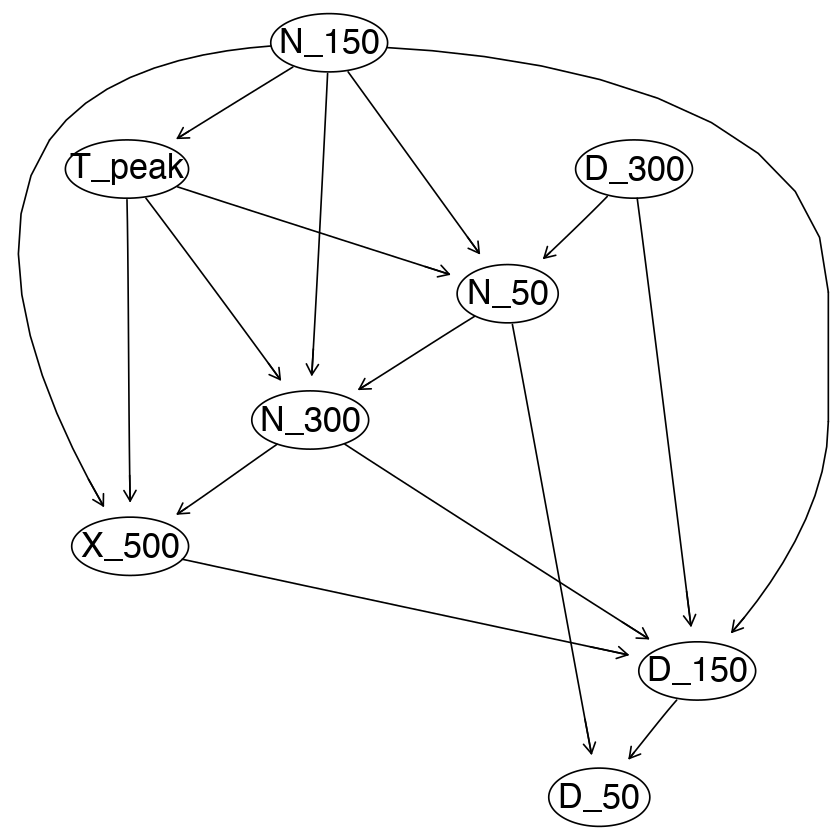

In [19]:
graphviz.plot(dag, shape = "ellipse")

We can compare the learned structure with the clustered graph. Therefore, we transform the learned Bayesian Network into an undirected graph and compare it with the correlation graph.

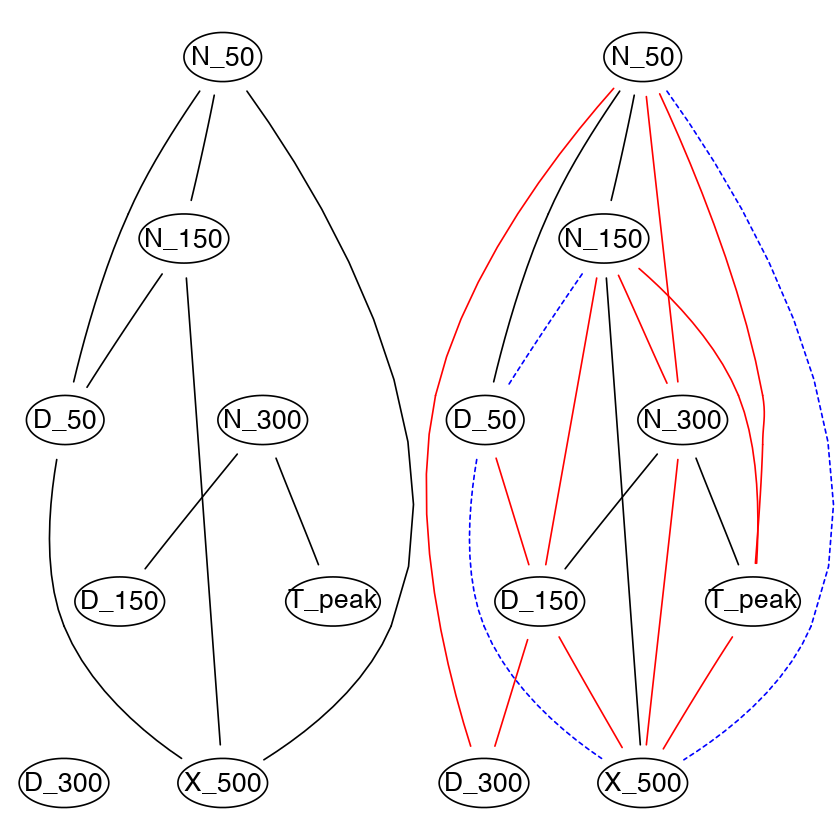

In [20]:
ug2 = empty.graph(colnames(rho))
for (edge in 1:nrow(dag$arcs)){
    f = dag$arcs[edge, 1]
    t = dag$arcs[edge, 2]
    ug2$arcs <- rbind(ug2$arcs, c(f,t))  
    ug2$arcs <- rbind(ug2$arcs, c(t,f))  
}
par(mfrow = c(1, 2))
graphviz.compare(ug, ug2, shape = "ellipse")

## Learn and apply the Bayesian Network

**Step 1:** learning the structure of the network.

Before we relearn the Baysian Network structure, we blacklist a few edges that are of little help in prediction.

In [21]:
bl = tiers2blacklist(list(c("N_50", "N_150", "N_300", "D_50", "D_150", "D_300", "T_peak"), "X_500"))
bl = rbind(bl, c("N_300", "N_50"), c("N_300", "D_50"), c("N_300", "N_150"), c("N_300", "D_150"), c("N_300", "D_300"))
bl = rbind(bl, c("D_300", "N_50"), c("D_300", "D_50"), c("D_300", "N_150"), c("D_300", "D_150"), c("D_300", "N_300"))
bl = rbind(bl, c("N_150", "N_50"), c("N_150", "D_50"), c("N_150", "D_150"))
bl = rbind(bl, c("D_150", "N_50"), c("D_150", "D_50"), c("D_150", "N_150"))
bl = rbind(bl, c("N_50", "D_50"), c("D_50", "N_50"))
bl = rbind(bl, c("T_peak", "D_50"), c("T_peak", "N_50"))
bl

from,to
X_500,N_50
X_500,N_150
X_500,N_300
X_500,D_50
X_500,D_150
X_500,D_300
X_500,T_peak
N_300,N_50
N_300,D_50
N_300,N_150


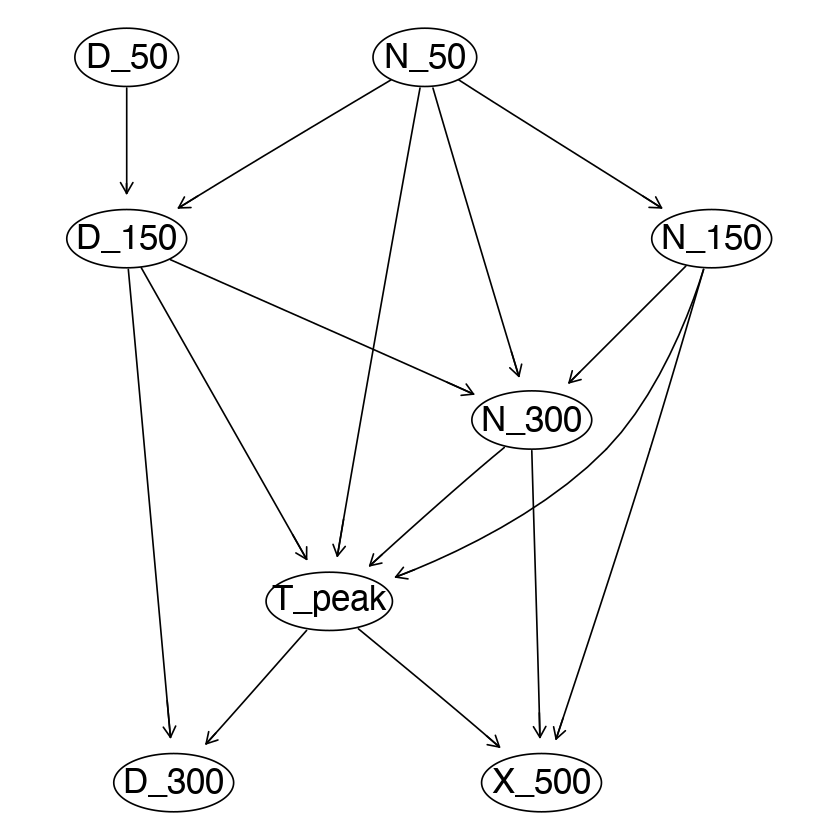

In [22]:
dag2 = hc(df, blacklist = bl)
graphviz.plot(dag2, shape = "ellipse")

However, the quality of `dag2` crucially depends on whether variables are normally distributed and on whether the relationships that link them are linear; from the exploratory analysis it is not clear that is the case for all of them. We also have no idea about which arcs represent strong relationships, meaning that they are resistant to perturbations of the data. We can address both issues using `boot.strength()` to:

1. resample the data using bootstrap;
2. learn a separate network from each bootstrap sample;
3. check how often each possible arc appears in the networks;
4. construct a consensus network with the arcs that appear more often.

In [23]:
str.df = boot.strength(df, R = 200, algorithm = "hc", algorithm.args = list(blacklist = bl))
(str.df)

,from,to,strength,direction
,<chr>,<chr>,<dbl>,<dbl>
1,N_50,N_150,0.870,1.00000000
2,N_50,N_300,0.780,1.00000000
3,N_50,D_50,0.000,0.00000000
4,N_50,D_150,0.980,1.00000000
5,N_50,D_300,0.280,1.00000000
6,N_50,T_peak,0.670,1.00000000
7,N_50,X_500,0.215,1.00000000
8,N_150,N_50,0.870,0.00000000
9,N_150,N_300,0.720,1.00000000


The return value of `boot.strength()` includes, for each pair of nodes, the strength of the arc that connects them (say, how often we observe `N_50` → `N_150`, answer quite often) and the strength of its direction (say, how often we observe `N_50` → `N_150` when we observe an arc at all between `N_50` and `N_150`, answer always). 

`boot.strength()` also computes the threshold that will be used to decide whether an arc is strong enough to be included in the consensus network.

In [24]:
attr(str.df, "threshold")

[1] 0.4

So, `averaged.network()` takes all the arcs with a strength of at least `0.4` and returns an averaged consensus network, unless a different threshold is specified. This this a plot of the network:

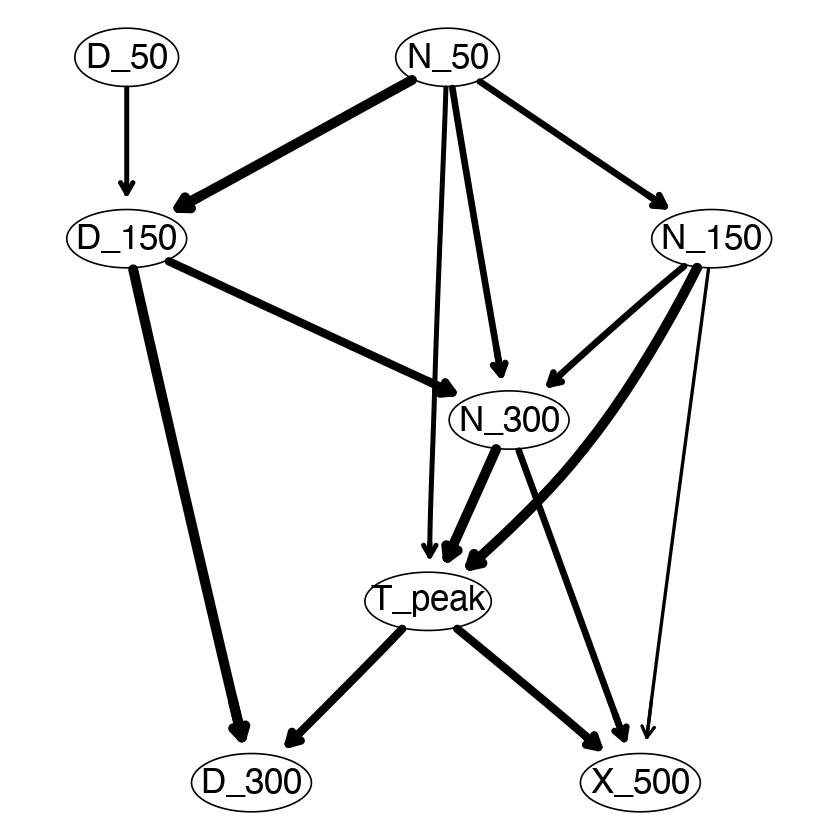

In [25]:
avg.df = averaged.network(str.df)
strength.plot(avg.df, str.df, shape = "ellipse")

Now we can compare the averaged network `avg.df` with the network we originally learned in from all the data `dag`. 

The most qualitative way is to plot the two networks side by side, with the nodes in the same positions, and highlight the arcs that appear in one network and not in the other, or that appear with different directions.

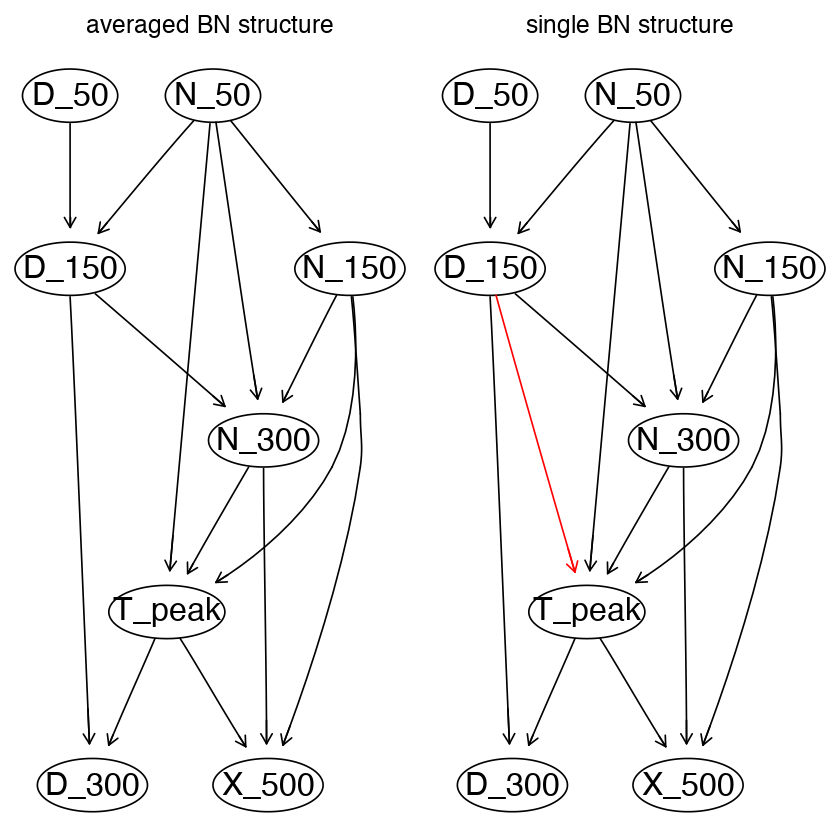

In [26]:
par(mfrow = c(1, 2))
graphviz.compare(avg.df, dag2, shape = "ellipse", main = c("averaged BN structure", "single BN structure"))

It is also a good idea to look at the threshold with respect to the distribution of the arc strengths:

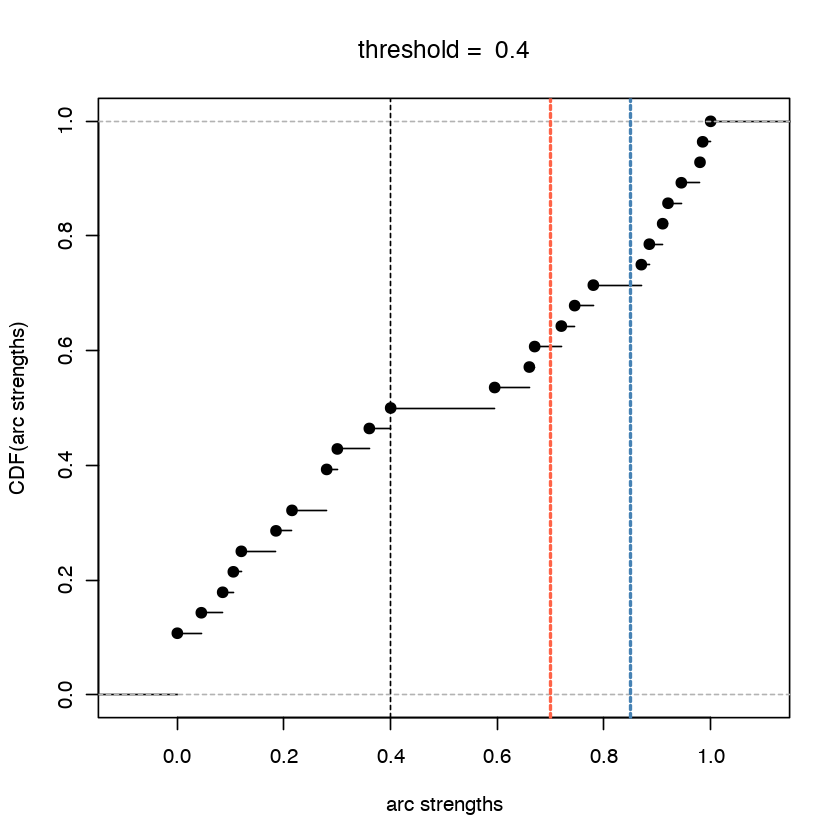

In [27]:
plot(str.df)
abline(v = 0.7, col = "tomato", lty = 2, lwd = 2)
abline(v = 0.85, col = "steelblue", lty = 2, lwd = 2)

**Step 2:** learning the conditional probabilities.

Having learned the structure, we can now learn the parameters. Since we are working with continuous variables, we choose to model them with a Gaussian Bayesian Network (`GBN`). Hence, if we fit the parameters of the network using their maximum likelihood estimate we have that each local distribution is a classic linear regression.

In [28]:
fitted.df = bn.fit(avg.df, df)
fitted.df


  Bayesian network parameters

  Parameters of node N_50 (Gaussian distribution)

Conditional density: N_50
Coefficients:
(Intercept)  
     5.5108  
Standard deviation of the residuals: 3.396421 

  Parameters of node N_150 (Gaussian distribution)

Conditional density: N_150 | N_50
Coefficients:
(Intercept)         N_50  
  17.805796     1.502184  
Standard deviation of the residuals: 7.915052 

  Parameters of node N_300 (Gaussian distribution)

Conditional density: N_300 | N_50 + N_150 + D_150
Coefficients:
(Intercept)         N_50        N_150        D_150  
 12.6020150   -0.3106794   -0.1179827    0.6565141  
Standard deviation of the residuals: 2.133747 

  Parameters of node D_50 (Gaussian distribution)

Conditional density: D_50
Coefficients:
(Intercept)  
   1.097608  
Standard deviation of the residuals: 0.7842617 

  Parameters of node D_150 (Gaussian distribution)

Conditional density: D_150 | N_50 + D_50
Coefficients:
(Intercept)         N_50         D_50  
   3.481340   

We could validate the network by checking against the "expert" knowlege.

1. "*Low/high $N_{150}$ values should be a predictor of low/high casulties $X_{500}$*"
2. "*Low/high $D_{50}$ values should be a predictor of late/early infection peaks $T_{peak}$*"

Both is confirmed.

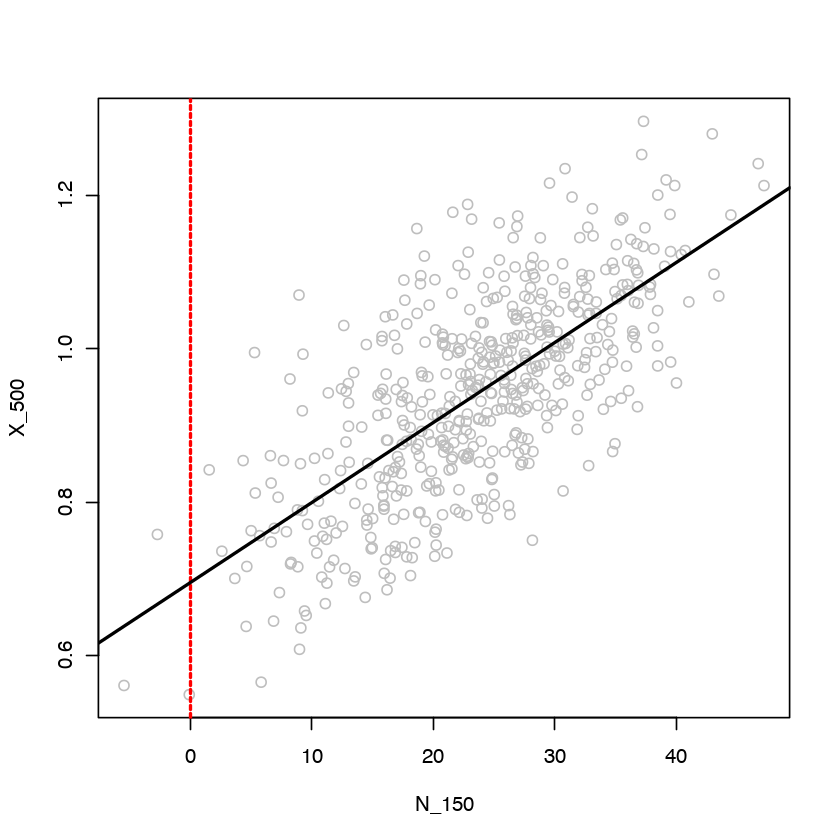

In [31]:
sim = cpdist(fitted.df, nodes = c("N_150", "X_500"), n = 1000, evidence = (D_150 > 0))
plot(sim, col = "grey")
abline(v = 0, col = 2, lty = 2, lwd = 2)
abline(h = 0, col = 2, lty = 2, lwd = 2)
abline(coef(lm(X_500 ~ N_150, data = sim)), lwd = 2)

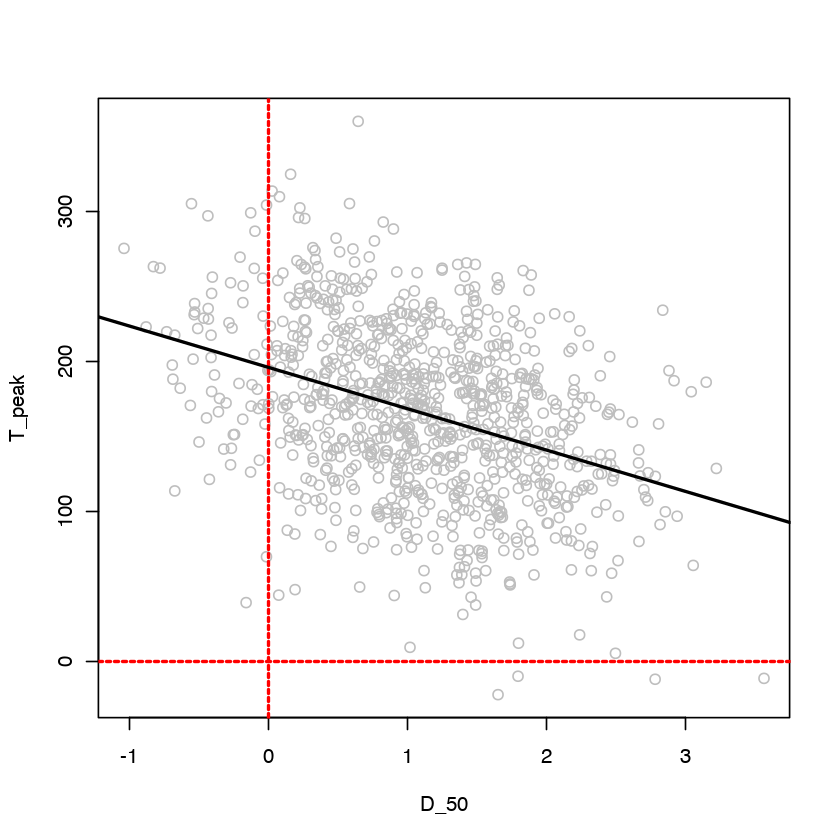

In [32]:
sim = cpdist(fitted.df, nodes = c("D_50", "T_peak"), n = 1000, evidence = (N_50 > 0))
plot(sim, col = "grey")
abline(v = 0, col = 2, lty = 2, lwd = 2)
abline(h = 0, col = 2, lty = 2, lwd = 2)
abline(coef(lm(T_peak ~ D_50, data = sim)), lwd = 2)

**Step 3:** Using the network.

We can predicting casulties based on observation.

In [29]:
new_data
predict(fitted.df, node = "X_500", data = new_data)

,N_50,N_150,N_300,D_50,D_150,D_300,T_peak
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.755674,20.22743,3.744598,1.723289,1.420417,-0.4327158,229.8769


[1] 0.701526

This is still quite close to the `0.7131789` predicted earlier.

We can compute probabilities with queries:

In [34]:
cpquery(fitted.df, event = (N_50 <= 7) & (N_150 <= 20) & (N_300 <= 10), evidence = (T_peak >= 100))

[1] 0.06869539

This is a bit less than `0.0730` predicted earlier.

## References

1. https://www.bnlearn.com/
2. https://www.bnlearn.com/examples/useR19-tutorial/